m = 17000
lr=0.001 -> J[0]=2.816226e+10, J[1999]=3.429181e+09
lr=0.01 -> J[0]=2.771301e+10, J[1999]=2.449938e+09
lr=0.05 -> J[0]=2.576593e+10, J[1999]=2.412656e+09
lr=0.1 -> J[0]=2.344592e+10, J[1999]=2.412284e+09
lr=0.2 -> J[0]=1.918538e+10, J[1999]=2.412262e+09
lr=0.255645 -> J[0]=1.703371e+10, J[1999]=2.412262e+09


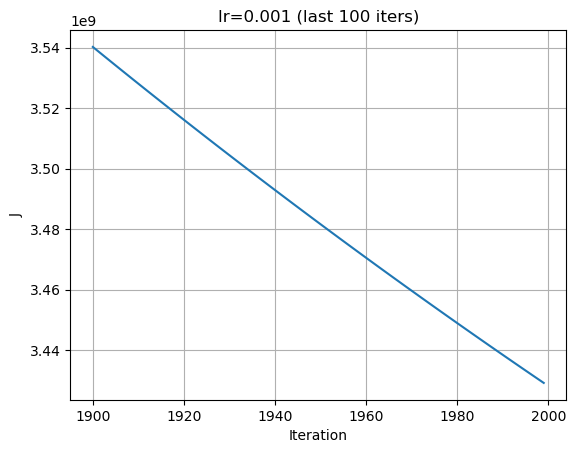

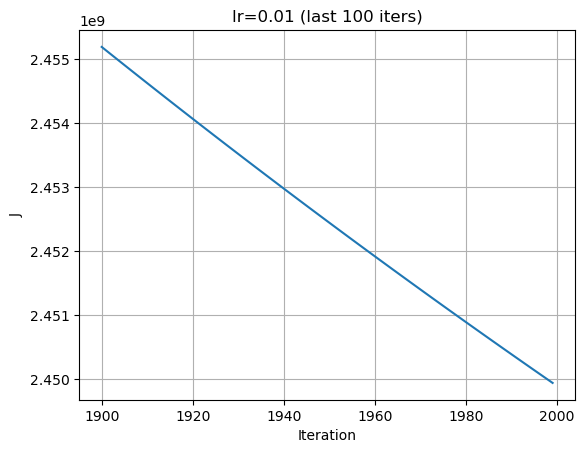

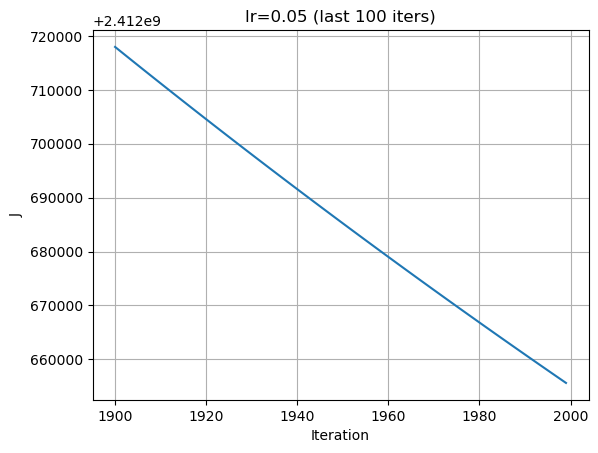

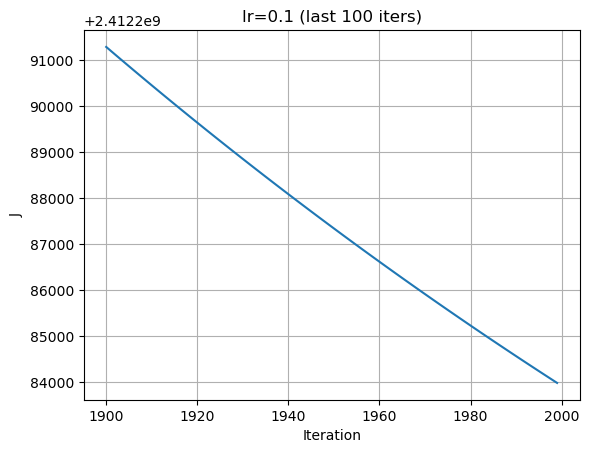

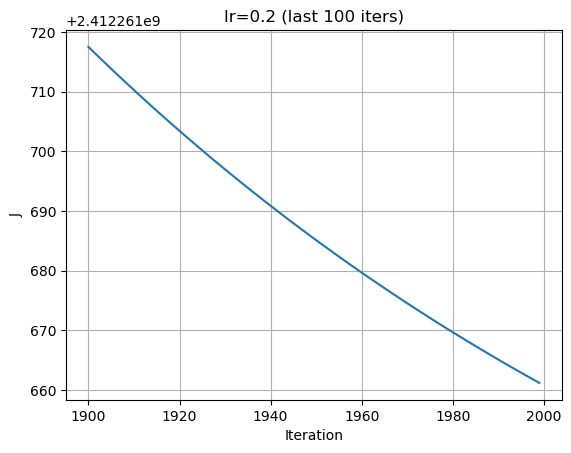

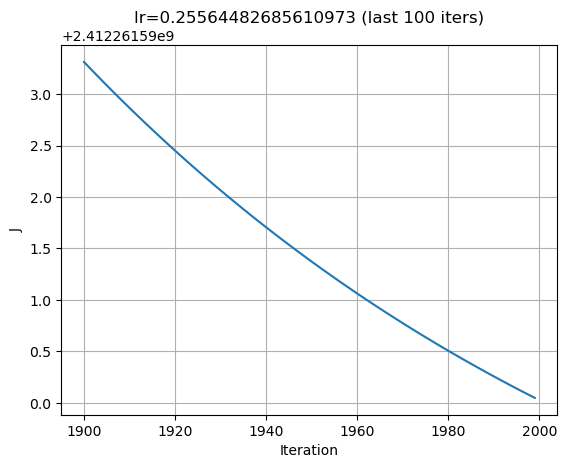

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- load + chuẩn hoá (giữ cấu trúc) ---
df = pd.read_csv('data/data2.csv')
x_raw = df.iloc[:, :-1].values.astype(np.float64)
y = df.iloc[:, -1].values.astype(np.float64)
m = len(y)
print("m =", m)

mu = x_raw.mean(axis=0)
sigma = x_raw.std(axis=0, ddof=0)
sigma_safe = np.where(sigma == 0, 1.0, sigma)
xn = (x_raw - mu) / sigma_safe
Y = y.reshape(-1,1)
X = np.column_stack([np.ones(m), xn]).astype(float)

# --- GD routine (batch) ---
def run_gd(X, Y, theta0, lr, iters=2000):
    m = X.shape[0]
    theta = theta0.copy().astype(float)
    J = np.zeros(iters)
    for i in range(iters):
        H = X.dot(theta)
        grad = (1.0/m) * X.T.dot(H - Y)
        theta = theta - lr * grad
        J[i] = (1.0/(2*m)) * np.sum((X.dot(theta) - Y)**2)
    return theta, J

# --- candidates to try (you can modify) ---
candidates = [0.001, 0.01, 0.05, 0.1, 0.2, 0.25564482685610973]
iters = 2000
np.random.seed(1)
theta0 = np.random.rand(X.shape[1], 1)

results = {}
for lr in candidates:
    th, J = run_gd(X, Y, theta0, lr, iters=iters)
    results[lr] = {'theta': th, 'J': J}
    print(f"lr={lr:.6g} -> J[0]={J[0]:.6e}, J[{iters-1}]={J[-1]:.6e}")

# --- plot last 100 iterations for clarity ---
for lr in candidates:
    plt.figure()
    plt.plot(np.arange(iters-100, iters), results[lr]['J'][-100:])
    plt.title(f"lr={lr} (last 100 iters)")
    plt.xlabel("Iteration")
    plt.ylabel("J")
    plt.grid(True)
    plt.show()
